# 암 진행도

In [217]:
import pandas as pd

df = pd.read_csv('/content/lung_cancer_mortality_data_large.csv' , nrows=20000)


df = df.sample(5000)

## 데이터 전처리

In [221]:
from sklearn.preprocessing import LabelEncoder

# Female:0 , Male:1
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# 암 단계 순서대로 0~4
df['cancer_stage'] = le.fit_transform(df['cancer_stage'])

# 가족 여부 No:0 , Yes:1
df['family_history'] = le.fit_transform(df['family_history'])

# smoking 값 replace
df['smoking_status'].replace({'Never Smoked':0 , 'Passive Smoker':1 , 'Former Smoker':2 , 'Current Smoker':3} , inplace=True)

# treatment_type
df['treatment_type'].replace({'Surgery':0 , 'Chemotherapy':1 , 'Radiation':2 , 'Combined':3} ,inplace=True)


# X = df[['other_cancer' , 'bmi' , 'asthma' , 'family_history' , 'smoking_status']]
X = df[['bmi' , 'bmi' ,'family_history' , 'other_cancer']]
y = df['cancer_stage']


In [219]:
# X : age , gender , fmaily_history , smoking_status , bmi , cholesterol_level , hypertension , asthma , cirrhosis , other_cancer
# y : cancer_stage

# X : age , gender , cancer_stage , family_history , smoking_status , bmi , cholesterol_level , hypertension , asthma , cirrhosis , other_cancer
new_df = df.drop(columns=['id','country','diagnosis_date','end_treatment_date','survived'])
new_df.corr()['cancer_stage'].sort_values()

family_history      -0.038447
other_cancer        -0.020396
asthma              -0.017020
gender              -0.015517
smoking_status      -0.001239
hypertension         0.002905
age                  0.005113
cholesterol_level    0.005956
treatment_type       0.009040
bmi                  0.011085
cirrhosis            0.011604
cancer_stage         1.000000
Name: cancer_stage, dtype: float64

[Text(0.5353647578348348, 0.9848484848484849, 'family_history <= 0.5\ngini = 0.75\nsamples = 3000\nvalue = [779, 714, 748, 759]'),
 Text(0.26473838236865893, 0.9545454545454546, 'bmi <= 16.25\ngini = 0.749\nsamples = 1513\nvalue = [360, 366, 375, 412]'),
 Text(0.11911084522348703, 0.9242424242424242, 'bmi <= 16.15\ngini = 0.659\nsamples = 19\nvalue = [9, 4, 5, 1]'),
 Text(0.11743991420160826, 0.8939393939393939, 'bmi <= 16.05\ngini = 0.694\nsamples = 14\nvalue = [5, 3, 5, 1]'),
 Text(0.11409805215785077, 0.8636363636363636, 'other_cancer <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0]'),
 Text(0.11242712113597202, 0.8333333333333334, 'gini = 0.5\nsamples = 4\nvalue = [2, 0, 2, 0]'),
 Text(0.11576898317972951, 0.8333333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.12078177624536578, 0.8636363636363636, 'other_cancer <= 0.5\ngini = 0.716\nsamples = 9\nvalue = [2, 3, 3, 1]'),
 Text(0.11911084522348703, 0.8333333333333334, 'gini = 0.722\nsamples = 6\nvalue = [

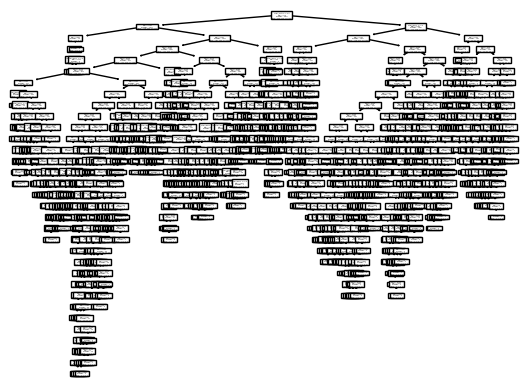

In [222]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.4 , random_state=1)

fdt = DecisionTreeClassifier(random_state=1)

fdt.fit(X_train , y_train)

plot_tree(fdt , feature_names=X.columns)

## best parameter 찾기

In [227]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [6,7,8,9,10],
    'min_samples_split' : [1,2,3,4,5],
    'min_impurity_decrease' : [0,0.0005,0.001,0.005]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1) , param_grid , cv=5 , n_jobs=-1)

gridSearch.fit(X_train , y_train)
print('inital score: ',gridSearch.best_score_)
print('initial parameters: ',gridSearch.best_params_)

inital score:  0.262
initial parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

[Text(0.5, 0.5, 'gini = 0.75\nsamples = 3000\nvalue = [779, 714, 748, 759]')]

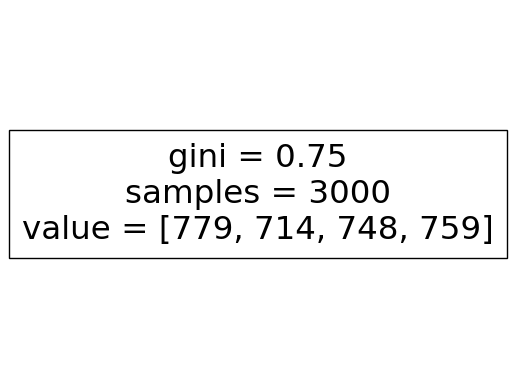

In [230]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split

sdt = DecisionTreeClassifier( random_state=1 , max_depth=gridSearch.best_params_['max_depth'] ,
                             min_samples_split=gridSearch.best_params_['min_samples_split'] ,
                              min_impurity_decrease=gridSearch.best_params_['min_impurity_decrease'])
# max_depth : 트리의 최대 깊이
# min_samples_split : 노드를 분할하기 위한 최소 샘플 데이터 수
# min_impurity_decrease : 최소 불순도

sdt.fit(X_train , y_train)

plot_tree(sdt , feature_names=X.columns)

## 정확도 (sdt - GrdisearchCV model)


In [231]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = sdt.predict(X_train)
print(confusion_matrix(y_train , y_pred))
print(classification_report(y_train , y_pred))

y_pred = sdt.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[779   0   0   0]
 [714   0   0   0]
 [748   0   0   0]
 [759   0   0   0]]
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       779
           1       0.00      0.00      0.00       714
           2       0.00      0.00      0.00       748
           3       0.00      0.00      0.00       759

    accuracy                           0.26      3000
   macro avg       0.06      0.25      0.10      3000
weighted avg       0.07      0.26      0.11      3000

[[500   0   0   0]
 [490   0   0   0]
 [515   0   0   0]
 [495   0   0   0]]
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       500
           1       0.00      0.00      0.00       490
           2       0.00      0.00      0.00       515
           3       0.00      0.00      0.00       495

    accuracy                           0.25      2000
   macro avg       0.06      0.25      0.10      2000
weighted avg       0.06      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## 정확도 (fdt - 그냥 돌)

In [232]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = fdt.predict(X_train)
print(confusion_matrix(y_train , y_pred))
print(classification_report(y_train , y_pred))

y_pred = fdt.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[528  89  86  76]
 [182 368  86  78]
 [189 126 355  78]
 [188 127 122 322]]
              precision    recall  f1-score   support

           0       0.49      0.68      0.57       779
           1       0.52      0.52      0.52       714
           2       0.55      0.47      0.51       748
           3       0.58      0.42      0.49       759

    accuracy                           0.52      3000
   macro avg       0.53      0.52      0.52      3000
weighted avg       0.53      0.52      0.52      3000

[[168 127 110  95]
 [187 124 105  74]
 [174 135 109  97]
 [173 118 106  98]]
              precision    recall  f1-score   support

           0       0.24      0.34      0.28       500
           1       0.25      0.25      0.25       490
           2       0.25      0.21      0.23       515
           3       0.27      0.20      0.23       495

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.25      2000
weighted avg       0.25      0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

cancer_classes = {0:'stage 1', 1:'stage 2', 2:'stage 3', 4:'stage 4'}



for k in range(3,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test , y_pred)
    print('인접 이웃의 수 k={}일 때 정확도는 {:0.2f} 입니다.'.format(k,score))

인접 이웃의 수 k=3일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=4일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=5일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=6일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=7일 때 정확도는 0.25 입니다.
인접 이웃의 수 k=8일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=9일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=10일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=11일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=12일 때 정확도는 0.28 입니다.
인접 이웃의 수 k=13일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=14일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=15일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=16일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=17일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=18일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=19일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=20일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=21일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=22일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=23일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=24일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=25일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=26일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=27일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=28일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=29일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=30일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=31일 때 정확도는 0.27 입니다.
인접 이웃의 수 k=32일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=33일 때 정확도는 0.26 입니다.
인접 이웃의 수 k=34일 